# Lab | Customer Analysis

In today's lesson we talked about linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs. You can continue using the same jupyter file. The file can be found in the `Data` folder.

### Complete the following task

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

- For the numerical variables:
  - Use Matplotlib to construct histograms to check the normality of the numerical variables visually
  - Check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
  
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

- Split data into Y (`total_claim_amount`) and X (numerical, independent variables)

- Conduct Linear Regressions
  - Using Statsmodels
  - Using sklearn
  - Interpret results

## Importamos librerias

In [1]:
import pandas as pd  
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, norm

import math

import statsmodels.api as sm
from statsmodels.formula.api import ols

## My code

In [3]:
#importamos el csv
data = pd.read_csv("/Users/davidmartinfernandez/Desktop/Ironhack/Bootcamp/LABS/UNIT_7/lab-ML-1/Data/marketing_customer_analysis.csv")

In [5]:
data.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [17]:
#Voy a realizar las buenas practicas y poner las columnas en minúscula y substituir los espacios por "_".
stand_col = []
for i in range(len(data.columns)):
    stand_col.append(data.columns[i].lower().replace(' ','_'))
data.columns = stand_col

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [51]:
#numerical columns
columnas_numericas=data.select_dtypes(include=[np.number])

In [54]:
columnas_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [52]:
#categorial columns
columnas_categoricas = data.select_dtypes(include=['object'])

In [55]:
columnas_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           9134 non-null   object
 1   state              9134 non-null   object
 2   response           9134 non-null   object
 3   coverage           9134 non-null   object
 4   education          9134 non-null   object
 5   effective_to_date  9134 non-null   object
 6   employmentstatus   9134 non-null   object
 7   gender             9134 non-null   object
 8   location_code      9134 non-null   object
 9   marital_status     9134 non-null   object
 10  policy_type        9134 non-null   object
 11  policy             9134 non-null   object
 12  renew_offer_type   9134 non-null   object
 13  sales_channel      9134 non-null   object
 14  vehicle_class      9134 non-null   object
 15  vehicle_size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


- For the numerical variables:
  - Use Matplotlib to construct histograms to check the normality of the numerical variables visually

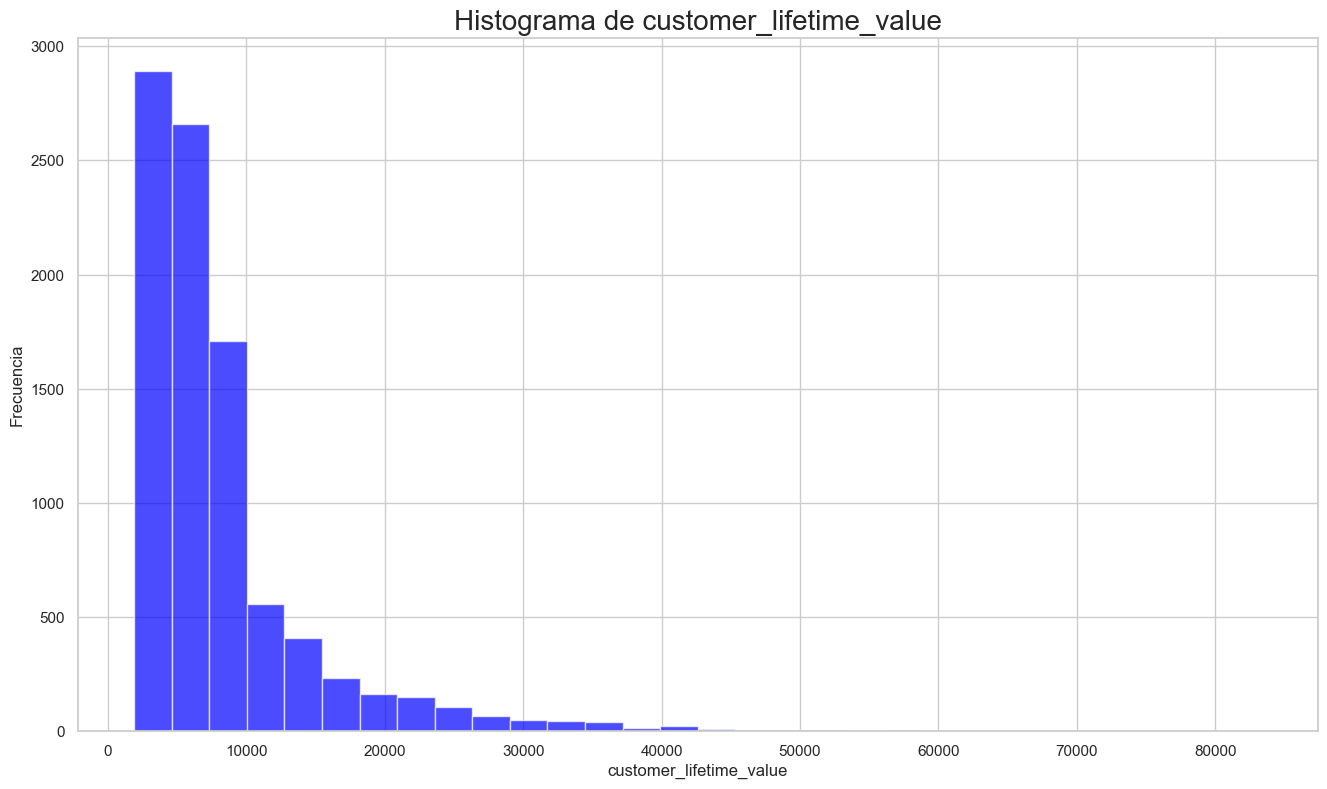

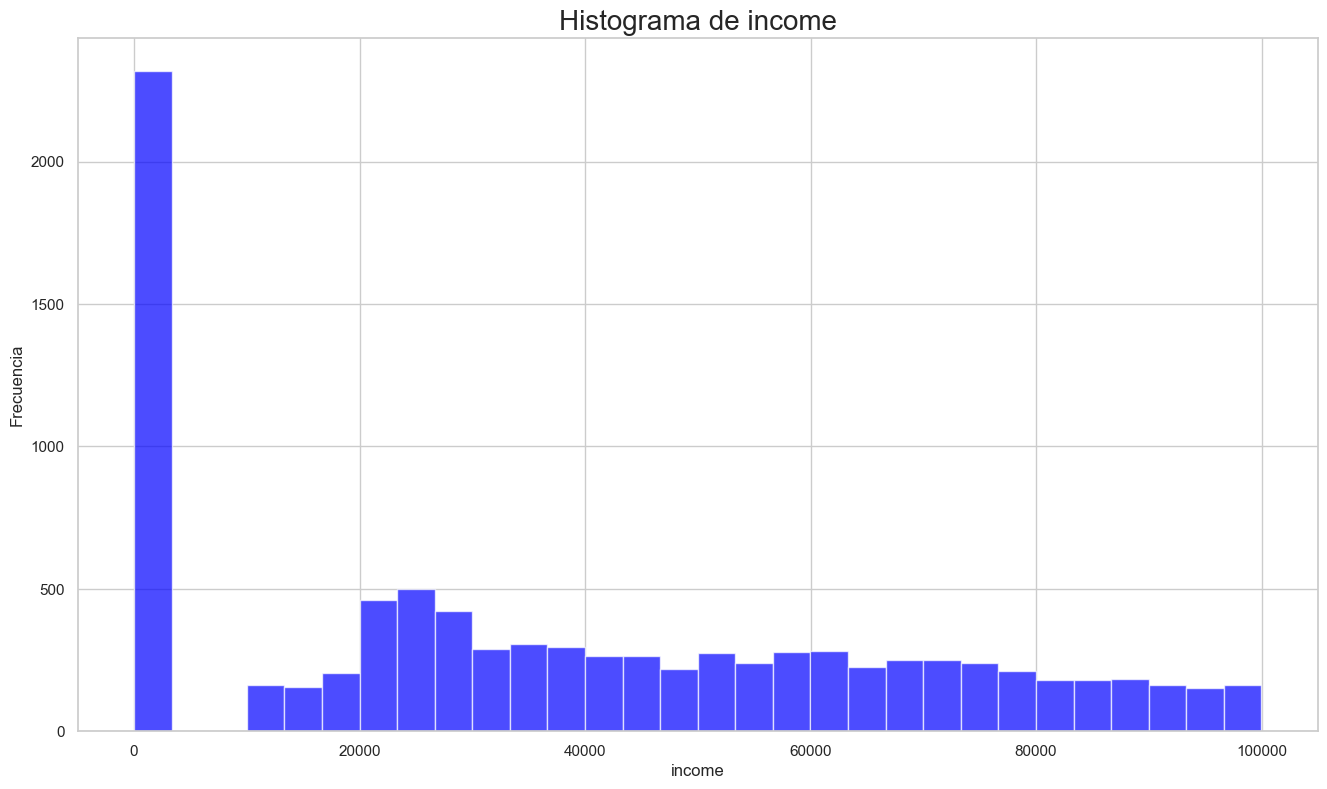

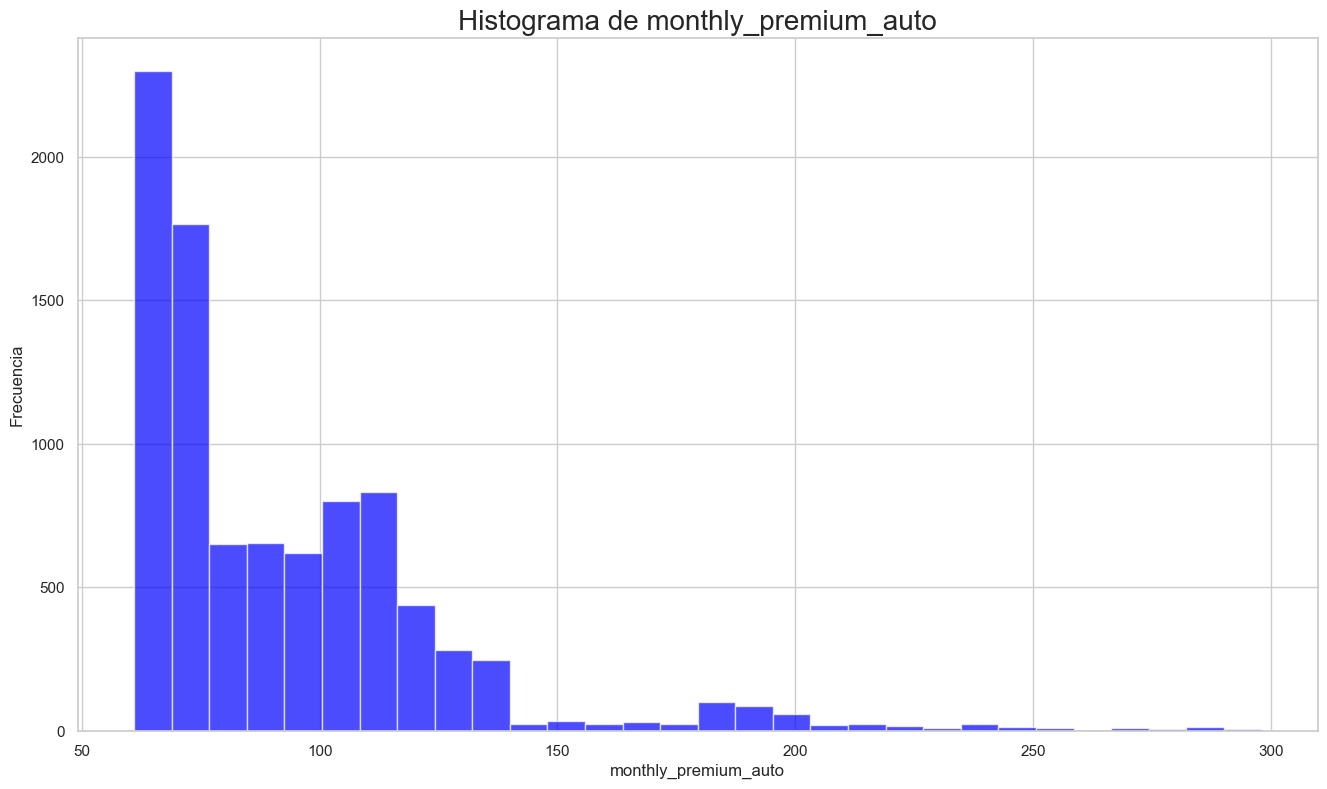

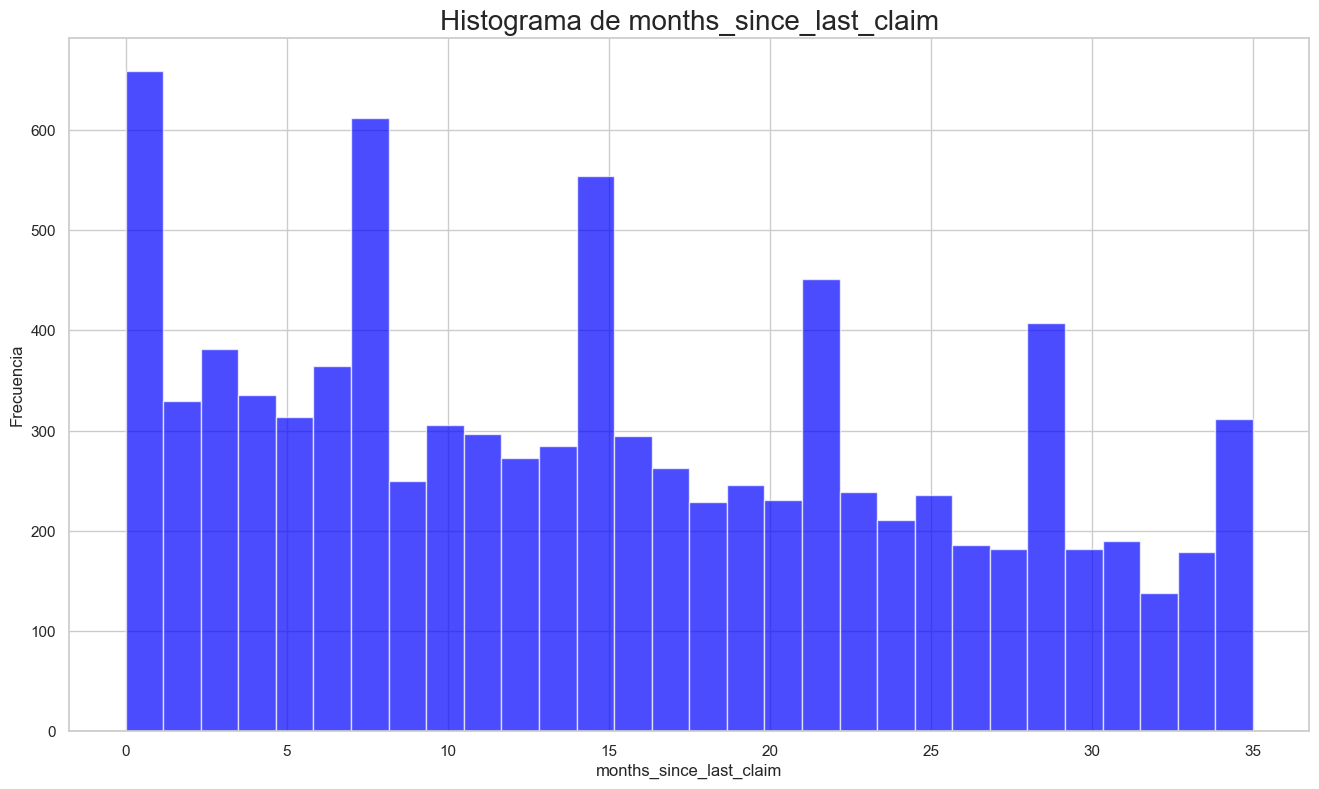

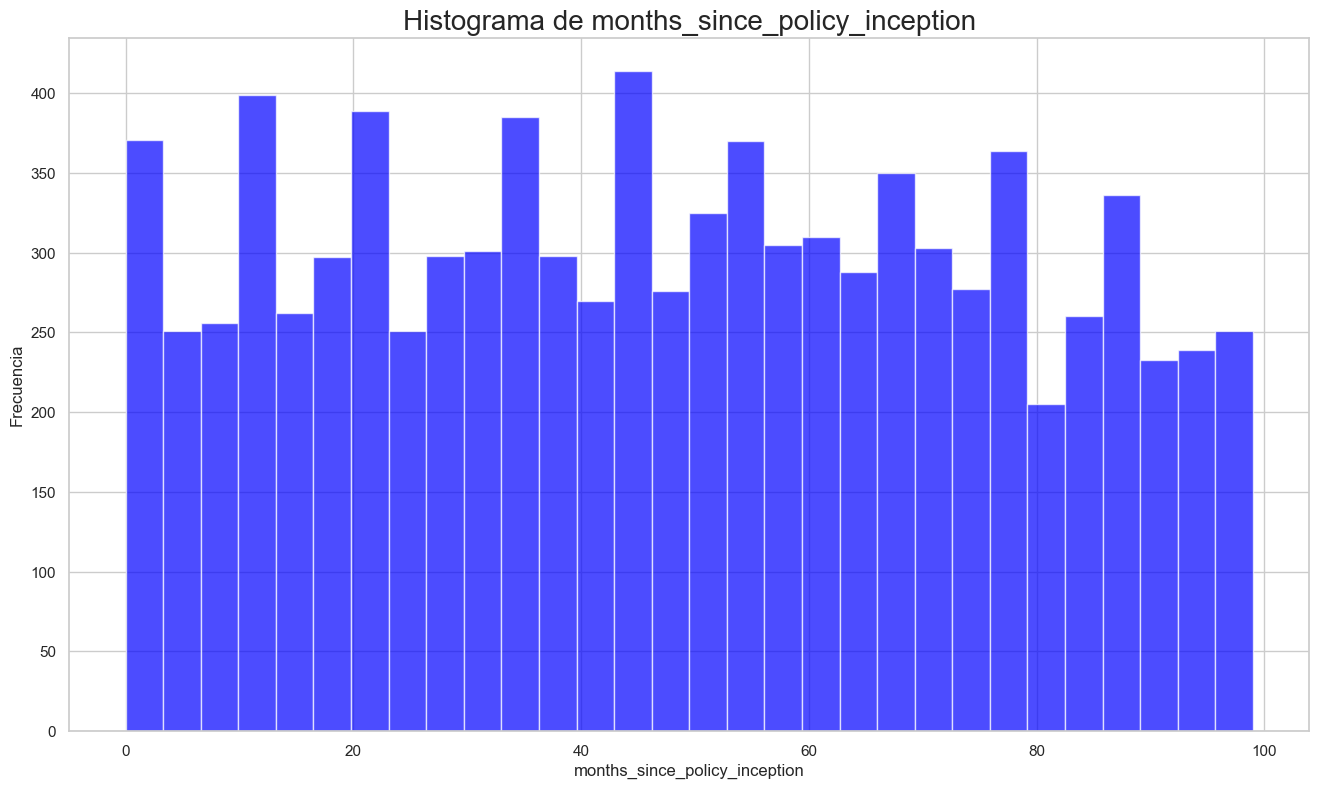

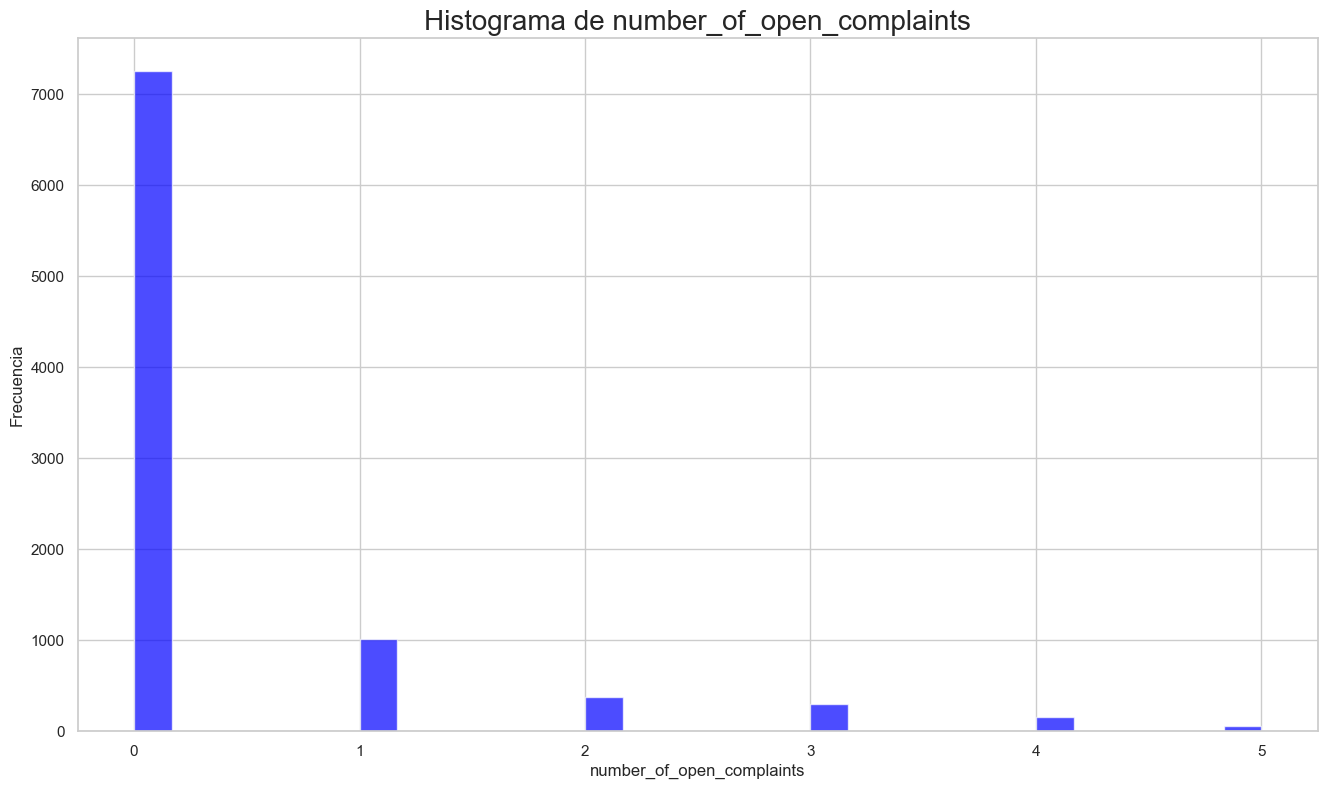

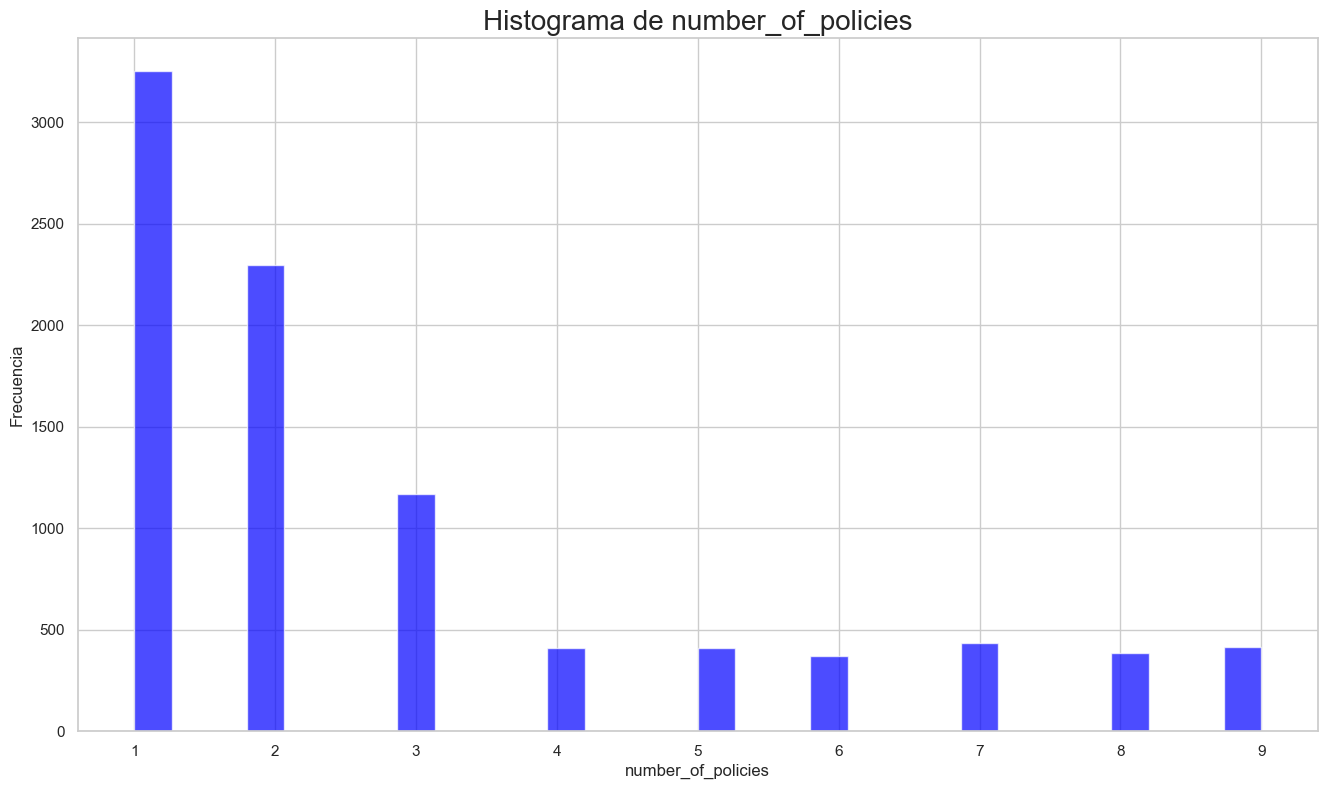

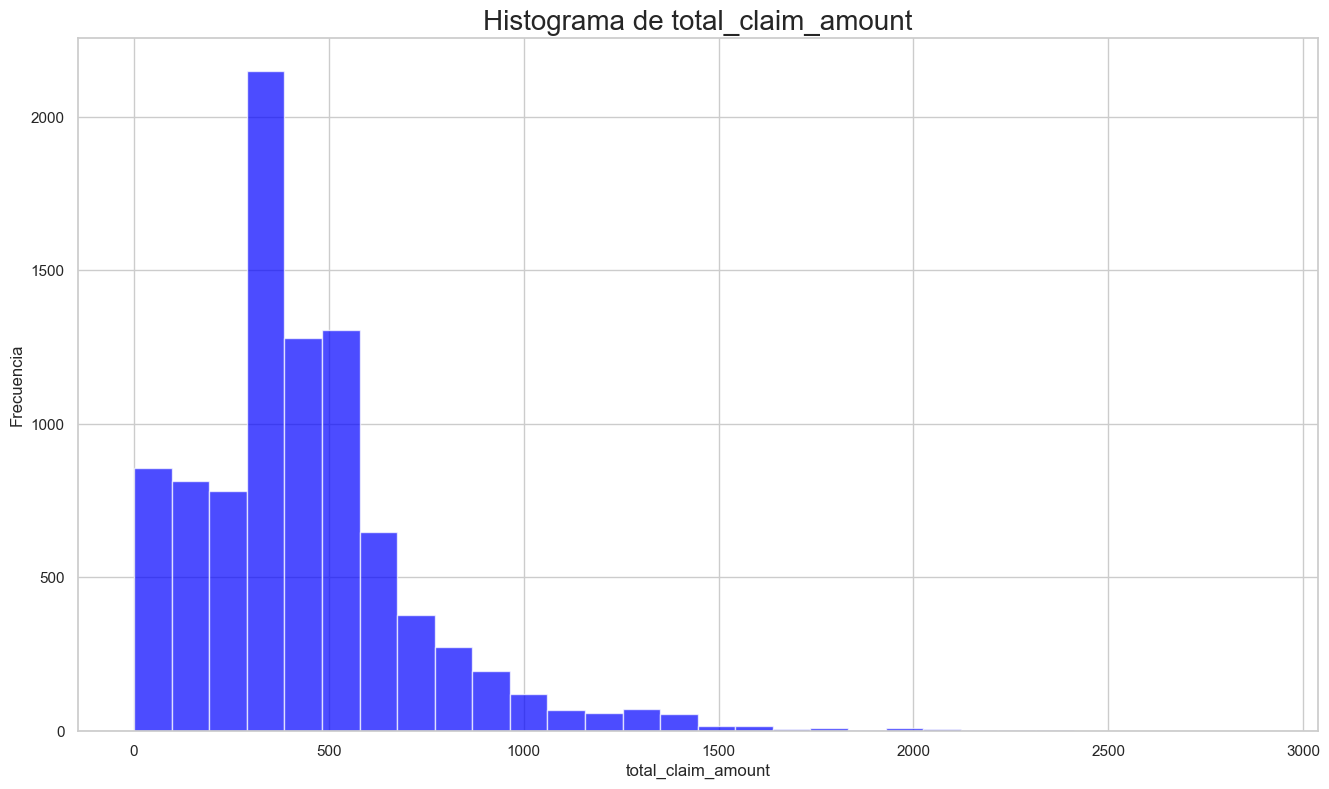

In [58]:
# Vamos a generar los histogramas para cada columna numerica
for col in columnas_numericas:
    plt.hist(data[col], bins=30, alpha=0.7, color='blue', edgecolor='white')
    plt.title(f'Histograma de {col}', size=20)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

  - Check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

In [77]:
#Vamos a ver la multicolinealidad entre la variable customer_lifetime_value y total_claim_amount
columnas_numericas[["customer_lifetime_value", "total_claim_amount"]].corr()

,customer_lifetime_value,total_claim_amount
customer_lifetime_value,1.000000,0.226451
total_claim_amount,0.226451,1.000000


In [78]:
#Vamos a ver la multicolinealidad entre la variable income y total_claim_amount
columnas_numericas[["income", "total_claim_amount"]].corr()

,income,total_claim_amount
income,1.000000,-0.355254
total_claim_amount,-0.355254,1.000000


In [79]:
#Vamos a ver la multicolinealidad entre la variable monthly_premium_auto y total_claim_amount
columnas_numericas[["monthly_premium_auto", "total_claim_amount"]].corr()

,monthly_premium_auto,total_claim_amount
monthly_premium_auto,1.000000,0.632017
total_claim_amount,0.632017,1.000000


In [80]:
#Vamos a ver la multicolinealidad entre la variable months_since_last_claim y total_claim_amount
columnas_numericas[["months_since_last_claim", "total_claim_amount"]].corr()

,months_since_last_claim,total_claim_amount
months_since_last_claim,1.000000,0.007563
total_claim_amount,0.007563,1.000000


In [63]:
#Vamos a ver la multicolinealidad entre la variable months_since_policy_inception y total_claim_amount
data[["months_since_policy_inception", "total_claim_amount"]].corr()

,months_since_policy_inception,total_claim_amount
months_since_policy_inception,1.000000,0.003335
total_claim_amount,0.003335,1.000000


In [81]:
#Vamos a ver la multicolinealidad entre la variable number_of_open_complaints y total_claim_amount
columnas_numericas[["number_of_open_complaints", "total_claim_amount"]].corr()

,number_of_open_complaints,total_claim_amount
number_of_open_complaints,1.000000,-0.014241
total_claim_amount,-0.014241,1.000000


In [82]:
#Vamos a ver la multicolinealidad entre la variable number_of_policies y total_claim_amount
columnas_numericas[["number_of_policies", "total_claim_amount"]].corr()

,number_of_policies,total_claim_amount
number_of_policies,1.000000,-0.002354
total_claim_amount,-0.002354,1.000000


In [83]:
#Vamos a ver la multicolinealidad entre la variable total_claim_amount y total_claim_amount, todo y que es una obiedad que sera una correlación de 1.
columnas_numericas[["total_claim_amount", "total_claim_amount"]].corr()

,total_claim_amount,total_claim_amount
total_claim_amount,1.0,1.0
total_claim_amount,1.0,1.0


Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [72]:
#Sólo eliminamos total_claim_amount consigo misma ya que como era evidente una variable con sigo misma tiene correlación 1.
#Vamos a realizar el heatmap de la variables menos total_claim_amount consigo misma.
correlation_matrix = columnas_numericas.corr()
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


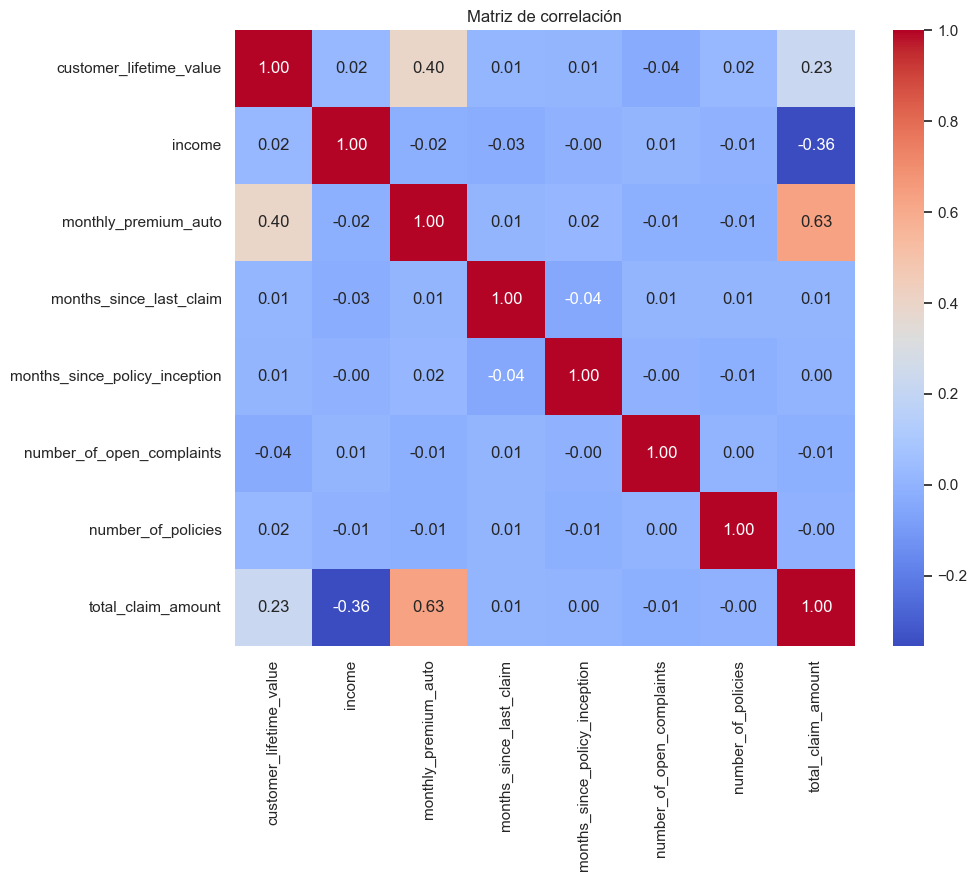

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

- Split data into Y (`total_claim_amount`) and X (numerical, independent variables)
- Conduct Linear Regressions
  - Using Statsmodels
  - Using sklearn
  - Interpret results

In [93]:
# Usando Statsmodels
# En aprendizaje supervisado. Recordar que usamos la varibales numericas.

Y = columnas_numericas['total_claim_amount'] #defino mi variable dependiente
X = columnas_numericas.drop(['total_claim_amount'], axis=1) #defino mi dataframe de variables independientes

X = sm.add_constant(X) #Agregar esta varaible constante.

model = sm.OLS(Y,X).fit() #genero el modelo

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:59:38   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [87]:
# Usando Sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Y = columnas_numericas['total_claim_amount']
X = columnas_numericas.drop(['total_claim_amount'], axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
print("R2 value is = ",round(lm.score(X,Y),2))

R2 value is =  0.52


In [88]:
# Para realizar la predicción
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
predictions = lm.predict(X)
mse = mean_squared_error(Y, predictions)
print("The mse of the model is = ",mse) #error que tratamos de minimizar.

R2 value is =  0.52
The intercept of the model is =  72.39096819184175
The coefficients of the model are =  [-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]
The mse of the model is =  40615.74326224916


Interpretación de resultados:
- R-squared, es de 0,51 por lo tanto al ser mayor de 0,5 lo consideramos fiable.
- P>, cuanto más cerca este de 0 la varible es más significativa. A partir de 0,1 ya no es significativo. Tenemos que, customer_lifetime_value, income, months_since_last_claim, son variables significativas.
- Nos indica una covarianza: No robusta